## I. Faster R-CNN

The Faster R-CNN model is based on the [Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks](https://arxiv.org/abs/1506.01497) paper.


### II. Torchvision Faster RCNN Models | [source](https://pytorch.org/vision/main/models/faster_rcnn.html)

| Function Name                           | Description                                                                                       |
|-----------------------------------------|---------------------------------------------------------------------------------------------------|
| _fasterrcnn_resnet50_fpn([, weights, ...])_          | Faster R-CNN model with a ResNet-50-FPN backbone from the Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks paper.    |
| _fasterrcnn_resnet50_fpn_v2([, weights, ...])_       | Constructs an improved Faster R-CNN model with a ResNet-50-FPN backbone from Benchmarking Detection Transfer Learning with Vision Transformers paper.  **Model used in this example**|
| _fasterrcnn_mobilenet_v3_large_fpn([, ...])_         | Constructs a high resolution Faster R-CNN model with a MobileNetV3-Large FPN backbone.              |
| _fasterrcnn_mobilenet_v3_large_320_fpn([, ...])_     | Low resolution Faster R-CNN model with a MobileNetV3-Large backbone tuned for mobile use cases.     |


Note: This is only one small sample of the offerings provided by torchvsion. You can continue to experiment with this selection and their weights or review other options!

### III. Training Dataset: Common Object in Conext (COCO)

Model is this example was trained using the MS COCO Dataset: The MS COCO (Microsoft Common Objects in Context) dataset is a large-scale object detection, segmentation, key-point detection, and captioning dataset. The dataset consists of 328K images.[source](https://paperswithcode.com/dataset/coco)

For more information on the model:

* [Main COCO Website](https://cocodataset.org/#home)

* [Research Paper](https://arxiv.org/abs/1405.0312): Tsung-Yi Lin, Michael Maire, Serge Belongie, James Hays, Pietro Perona, Deva Ramanan, Piotr Dollar, and C Lawrence ´Zitnick. Microsoft COCO: Common objects in context. In ECCV. 2014.



Here is an example of the Stuff Categories within the dataset.

In [1]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , 
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , 
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , 
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , 
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

print(len(coco_names))

91


### IV. Example: Faster R-CNN model with a ResNet-50-FPN backbone (V2) and Default weights

This process will take some to run the first time (if you are working wuth a cpu like me). 

* There are a couple of torchvision object detection models to experiment with so feel free to experiments with the weights.

Model Weights: _These weights were produced using an enhanced training recipe to boost the model accuracy_

For details on the [PyTorch Documentation of the Model](https://pytorch.org/vision/main/models/generated/torchvision.models.detection.fasterrcnn_resnet50_fpn_v2.html)

For the [research](https://arxiv.org/abs/2111.11429) behind the model.

In [2]:
# Note that this script was pulled from here: https://pytorch.org/vision/main/models#object-detection
# Imports
from torchvision.io.image import read_image

# Explore the torchvision documentation to apply the other models and their weights
from torchvision.models.detection import (
    fasterrcnn_resnet50_fpn_v2,
    FasterRCNN_ResNet50_FPN_V2_Weights,
)
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image
from IPython.display import display

In [3]:
# Reading in a sample image from the `America` image folder from the Free to Reuse Data Package
img = read_image("images/image_1.jpg")

RuntimeError: [Errno 2] No such file or directory: 'images/image_1.jpg'

/Users/aisaiahpellecer/Desktop/lclabs-jfp24/loc_env/lib/python3.9/site-packages/torchvision/utils.py:223: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


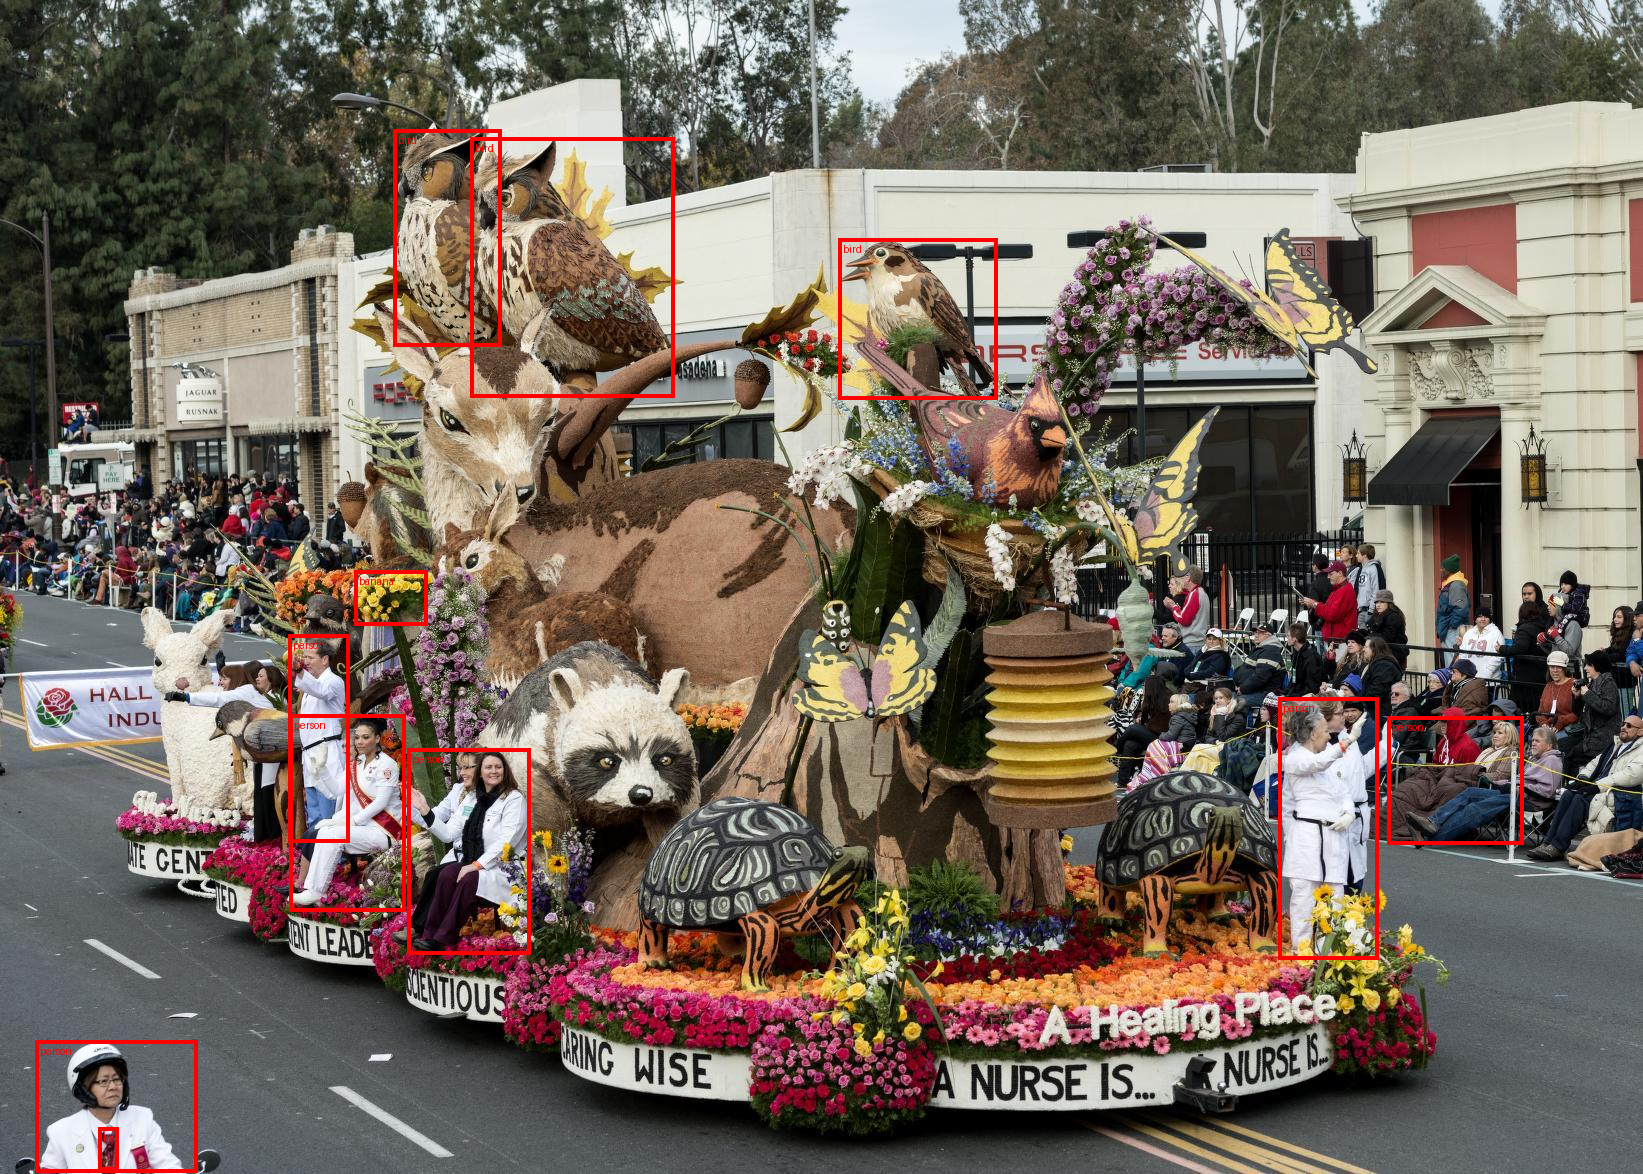

In [ ]:
# Step 1: Initialize model with the best available weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
labels = [weights.meta["categories"][i] for i in prediction["labels"]]
box = draw_bounding_boxes(
    img, boxes=prediction["boxes"], labels=labels, colors="red", width=4, font_size=30
)
im = to_pil_image(box.detach())
# im.show()

# Displays the Image
display(im)

### V. Experimentation

Use images from the _images/_ folder to test the model's performance and test out different box_score_thresholds.

In [ ]:
def object_detection(image_path, threshold=0.9):
    img = read_image(image_path)
    # Step 1: Initialize model with the best available weights
    weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
    model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=threshold)
    model.eval()

    # Step 2: Initialize the inference transforms
    preprocess = weights.transforms()

    # Step 3: Apply inference preprocessing transforms
    batch = [preprocess(img)]

    # Step 4: Use the model and visualize the prediction
    prediction = model(batch)[0]
    labels = [weights.meta["categories"][i] for i in prediction["labels"]]
    box = draw_bounding_boxes(
        img,
        boxes=prediction["boxes"],
        labels=labels,
        colors="red",
        width=4,
        font_size=30,
    )
    im = to_pil_image(box.detach())
    # im.show()

    # Displays the Image
    display(im)

In [ ]:
# object_detection('images/image_42.jpg')

/Users/aisaiahpellecer/Desktop/lclabs-jfp24/loc_env/lib/python3.9/site-packages/torchvision/utils.py:223: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


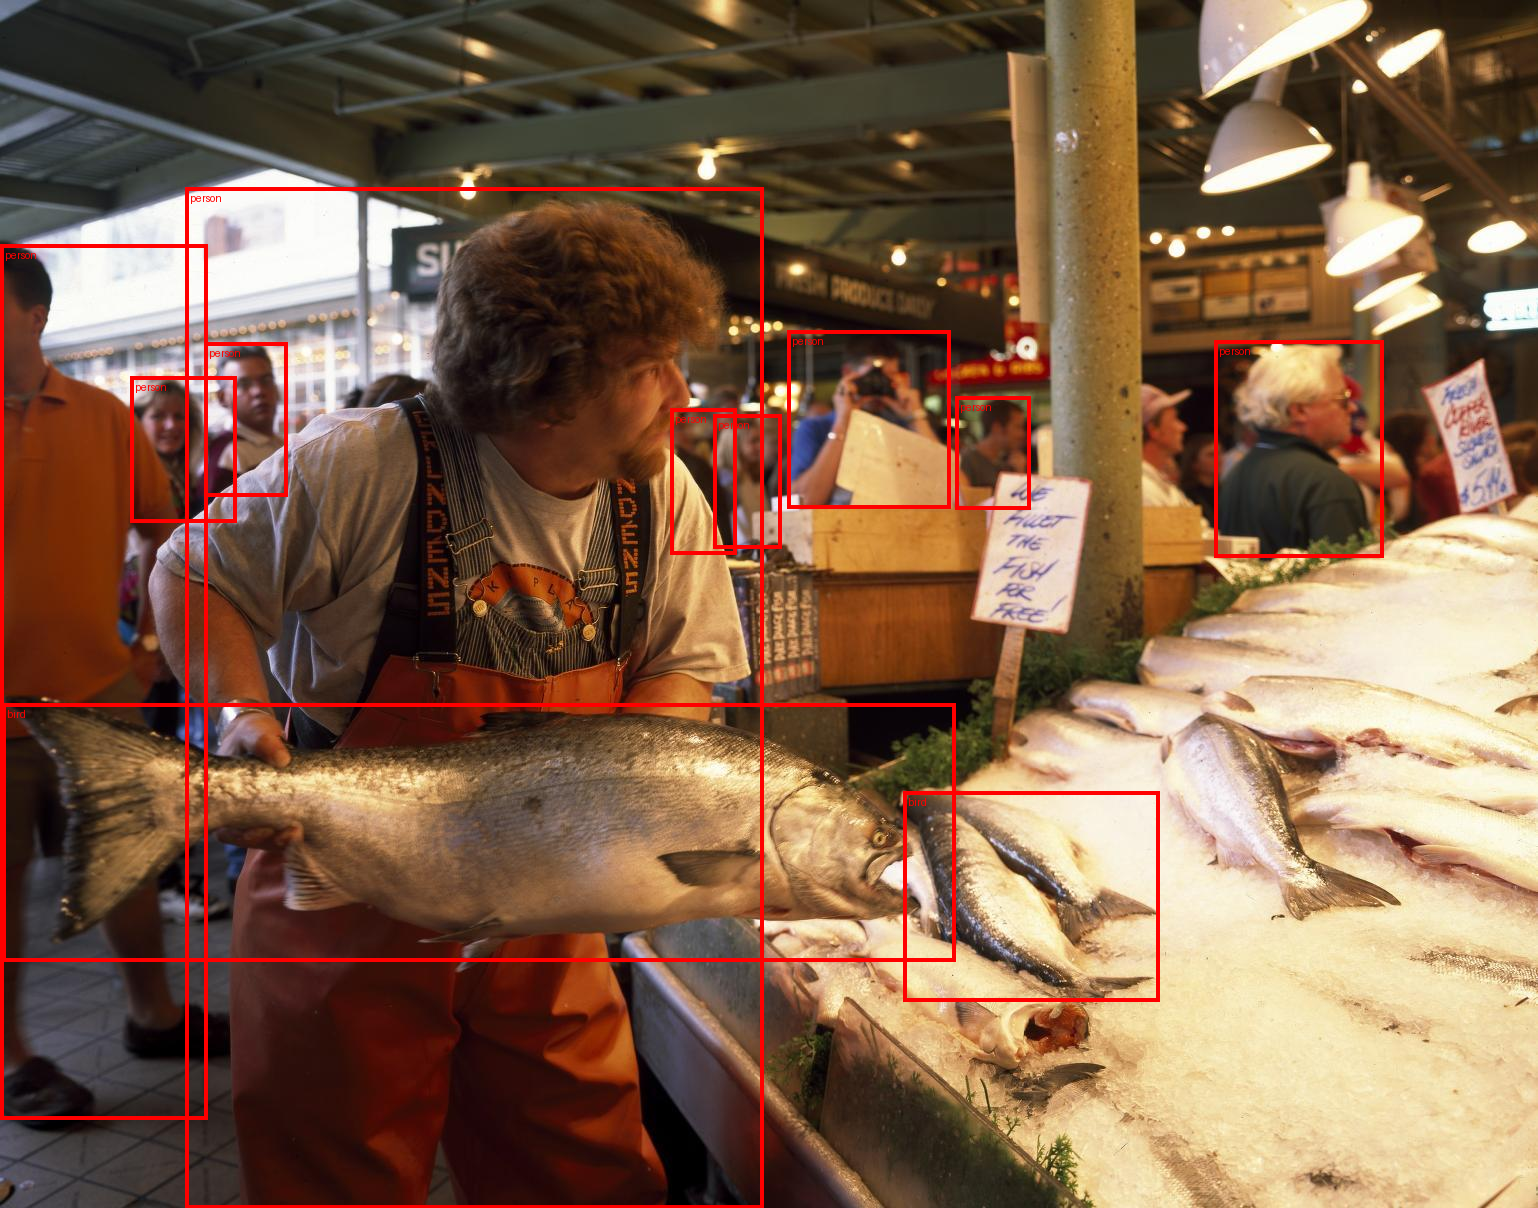

In [ ]:
object_detection("images/image_28.jpg")

In [ ]:
# object_detection('images/image_40.jpg',0.8)

In [ ]:
# object_detection('images/image_35.jpg',0.5)

In [ ]:
# object_detection('images/image_30.jpg',0.7)